<a href="https://colab.research.google.com/github/UnitForDataScience/ML-DL-Open-Lab-Series/blob/main/Neural_Networks_XORProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ===============================================================
# **XOR Problem: Understanding and Solving It Using Three Methods**
# ===============================================================

## **XOR Problem Statement**

The XOR (Exclusive OR) problem is a fundamental problem in machine learning and neural networks.
It is a binary classification problem where the output is **1** if the number of **1s** in the
input is **odd**, and **0** otherwise. The **XOR problem** is a classic example of a **non-linearly separable classification task**. The XOR problem is a classic machine learning challenge that demonstrates the limitations of linear models and highlights the power of non-linear models like neural networks. In this notebook, we will cover various ways to build neural netwroks to solve the XOR Problem.

Mathematically, XOR function is defined as:

    A ⊕ B = (A ∨ B) ∧ ¬(A ∧ B)

Where:
- `A` and `B` are binary inputs (0 or 1).
- `⊕` represents the XOR operation.
- The output is **1** only when the inputs are different.

---

### **Truth Table for XOR**
| A | B | XOR Output |
|---|---|------------|
| 0 | 0 | 0          |
| 0 | 1 | 1          |
| 1 | 0 | 1          |
| 1 | 1 | 0          |

---

### **Why is XOR a Challenging Problem?**
The XOR problem is **not linearly separable**, meaning that a simple linear model
(such as logistic regression or a single-layer perceptron) cannot correctly classify
the XOR function. A **non-linear decision boundary** is required.

This makes XOR a classic example that requires **multi-layer neural networks**
or feature transformations to learn correctly.

---

### **Objective**
In this notebook, we will solve the XOR problem using various methods:

1. **Scikit-Learn** - Classic ML Classifiers
2. **Scikit-Learn** - with MLPClassifier.
3. **TensorFlow-Keras** - Implementing a simple neural network.
4. **From Scratch** - Implementing a neural network manually without ML
libraries.
4. **Various Hybrid Approaches**

Each approach will demonstrate how XOR can be solved effectively and highlight the necessity
of non-linearity in learning complex patterns.




In [1]:
### data manupulation
import pandas as pd
import numpy as np

### data visisualization
import matplotlib.pyplot as plt
import seaborn as sns


### modeling and metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf


import warnings
warnings.filterwarnings("ignore", category=UserWarning)


## **XOR Dataset**


In [2]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])


y = np.array([[0],
              [1],
              [1],
              [0]])

# **1. Solving XOR Problem With Classic ML Classifiers: SVM**

Linear SVM Accuracy: 0.5


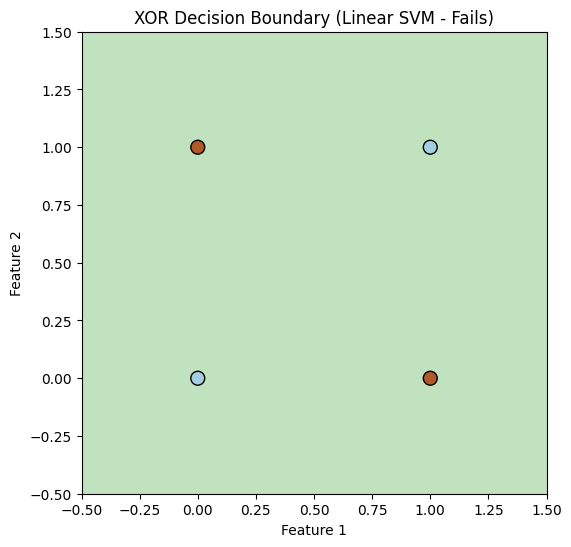

In [3]:
####### Linear SVM - Fails

### train model
linear_svm = LinearSVC(max_iter=10000, random_state=42)
linear_svm.fit(X, y)

### make predictions
y_pred_linear = linear_svm.predict(X)

### get accuracy
linear_accuracy = accuracy_score(y, y_pred_linear)

print("Linear SVM Accuracy:", linear_accuracy)


### make mesh grid for decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300), np.linspace(-0.5, 1.5, 300))
Z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

### visualize decision boundary for Linear SVM
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)  ### decision regions
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap=plt.cm.Paired)  ### data points
plt.title("XOR Decision Boundary (Linear SVM - Fails)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(False)
plt.show()

RBF Kernel SVM Accuracy: 1.0


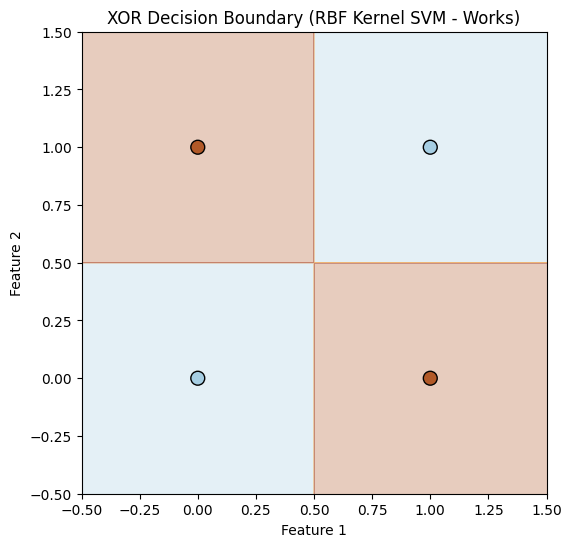

In [4]:
####### RBF Kernel SVM(Non-Linear)


### train model
rbf_svm = SVC(kernel='rbf', gamma='scale', random_state=42)
rbf_svm.fit(X, y)


### predict
y_pred_rbf = rbf_svm.predict(X)

### obtain accuracy
rbf_accuracy = accuracy_score(y, y_pred_rbf)

print("RBF Kernel SVM Accuracy:", rbf_accuracy)

### make mesh grid for decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300), np.linspace(-0.5, 1.5, 300))
Z = rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

### plot ecision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap=plt.cm.Paired)
plt.title("XOR Decision Boundary (RBF Kernel SVM - Works)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(False)
plt.show()

## **2. Solve XOR Problem Using Neural Networks in Scikit-Learn**

### **How Scikit-Learn Neural Networks Work**
Scikit-Learn provides the `MLPClassifier` class to implement a **multi-layer perceptron (MLP)**. Key features include:
- **Hidden Layers and Neurons**: MLPs can handle non-linear separability by adding hidden layers with non-linear activation functions.
- **Activation Functions**: Functions like `relu` and `tanh` introduce non-linearity, enabling the network to learn complex patterns.
- **Backpropagation**: The MLP uses gradient-based optimization algorithms (e.g., stochastic gradient descent or Adam) for training.
- **Scikit-Learn Simplicity**: Hyperparameters such as the number of hidden layers, learning rate, and solver can be adjusted easily.

---

### **Steps to Solve XOR Problem**

1. **Initialize the Neural Network**:
   - Use `MLPClassifier` from Scikit-Learn and define hidden layers, activation functions, solver, and other hyperparameters.

2. **Train the Model**:
   - Fit  MLP to the XOR dataset using the `fit` method.

3. **Make Predictions**:
   - Use the `predict` method to evaluate the performance on the dataset.

4. **Visualize Decision Boundary**:
   - Plot the decision boundary to observe how the neural network separates the XOR classes.

Training Accuracy: 1.0
Input: [0 0], Predicted: 0, Actual: [0]
Input: [0 1], Predicted: 1, Actual: [1]
Input: [1 0], Predicted: 1, Actual: [1]
Input: [1 1], Predicted: 0, Actual: [0]


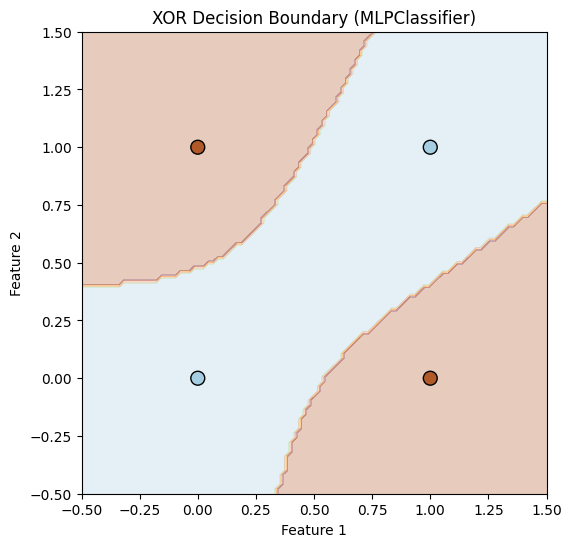

In [5]:
import random
import torch  ### needed for ensuring absolute reproducibility in mixed environments

### set random seeds for absolute reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)  ### this ensures PyTorch compatibility if used in your project



### define MLP model with improved parameters
model = MLPClassifier(hidden_layer_sizes=(8, 8),  ### two hidden layers with 8 neurons each
                      activation='tanh',          ### 'tanh' activation- works better for XOR
                      solver='adam',              ### adam optimizer
                      alpha=0.001,                ### small L2 penalty - better generalization
                      learning_rate_init=0.01,    ### learning rate initialization
                      max_iter=10000,             ### increased iterations to ensure convergence
                      random_state=42)

### train MLP model
model.fit(X, y)

### predict
y_pred = model.predict(X)

### obtain accuracy
accuracy = accuracy_score(y, y_pred)
print("Training Accuracy:", accuracy)

### print model predictions
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {y_pred[i]}, Actual: {y[i]}")

### visualize decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                     np.linspace(-0.5, 1.5, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap=plt.cm.Paired)
plt.title("XOR Decision Boundary (MLPClassifier)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## **3. Solving XOR Problem with TensorFlow/Keras**

### **How TensorFlow/Keras Solves XOR**
TensorFlow/Keras allows building a neural network using the **Sequential API**:
1. **Input Layer**: Two neurons (corresponding to the two input features).
2. **Hidden Layer**: A fully connected layer with non-linear activation (`tanh` or `relu`) to model non-linear patterns.
3. **Output Layer**: A single neuron with `sigmoid` activation for binary classification.
4. **Optimization**: The Adam optimizer minimizes binary cross-entropy loss.

---

### **Steps to Solve the XOR Problem**


1. **Build the Neural Network**:
   - Use the Keras `Sequential` API to define a model with hidden layer.

2. **Compile the Model**:
   - Specify the loss function (`binary_crossentropy`), optimizer (`adam`), and metrics (`accuracy`).

3. **Train the Model**:
   - Fit the model on the XOR dataset for a sufficient number of epochs.

4. **Evaluate and Visualize**:
   - Predict on the dataset to verify accuracy.
   - Visualize the decision boundary.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Training Accuracy: 1.0
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


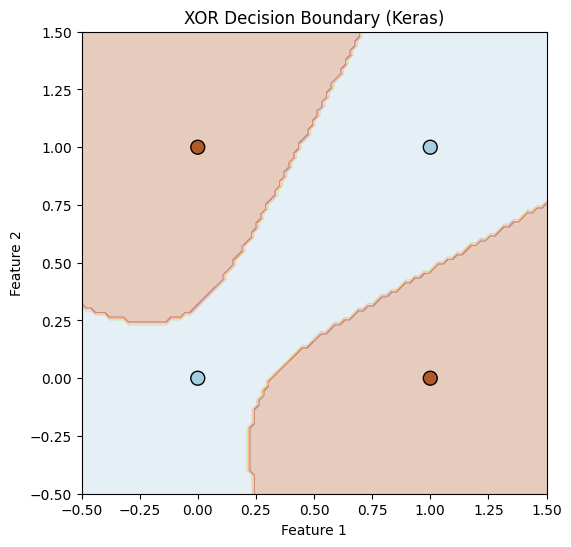

In [6]:
### random seeds for absolute reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


### define MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='tanh', input_shape=(2,)),  ### first hidden layer (8 neurons)
    tf.keras.layers.Dense(8, activation='tanh'),                    ### second hidden layer (8 neurons)
    tf.keras.layers.Dense(1, activation='sigmoid')                  ### output layer (binary classification)
])

### compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',  ### Binary classification
              metrics=['accuracy'])

### train model
model.fit(X, y, epochs=10000, verbose=0)  ### train for 10,000 epochs silently

### predict
y_pred = (model.predict(X) > 0.5).astype(int)

### evaluate accuracy
accuracy = np.mean(y_pred.flatten() == y.flatten())
print("Training Accuracy:", accuracy)

### print predictions
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {y_pred[i][0]}, Actual: {y[i][0]}")

### visualize decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                     np.linspace(-0.5, 1.5, 100))
Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype(int)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor='k', s=100, cmap=plt.cm.Paired)
plt.title("XOR Decision Boundary (Keras)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## **4.Procedural Neural Network Implementation Using NumPy and Adam Optimizer**

This method implements a **feedforward neural network** (Multi-Layer Perceptron or MLP) from scratch using **procedural programming** with **NumPy** for matrix operations.

## Key Features
- **Fully Procedural Implementation**:
  - All logic (initialization, forward propagation, backpropagation, and optimization) is implemented as standalone code blocks.
  - Does not use classes or object-oriented programming principles.
  
- **Architecture**:
  - 2 input neurons → 8 hidden neurons (2 hidden layers) → 1 output neuron.
  - Uses **tanh** activation for hidden layers and **sigmoid** activation for the output layer.

- **Optimization**:
  - Implements **Adam Optimizer** for efficient weight updates.
  - Tracks momentum and variance of gradients to improve convergence.

- **Reproducibility**:
  - Uses fixed random seeds for **Xavier initialization** to ensure identical results across runs.


## When to Use This Approach
- **Educational Purposes**:  
  - To learn how neural networks work internally (forward pass, backpropagation, optimization).  

- **Simple Problems**:  
  - For small datasets (e.g., XOR problem) where no deep learning frameworks are needed.

- **Customization**:  
  - When you need full control over the network's architecture, activations, or optimizers.

---

## Advantages
- **Lightweight**: No external dependencies (e.g., TensorFlow, PyTorch).  
- **Highly Customizable**: Can modify every part of the network (e.g., activations, optimization).  
- **Educational Value**: Demonstrates how neural networks function step-by-step.  


---

## Limitations
- **Not Scalable**:  
  - Difficult to extend to large networks or datasets.

- **No Modularity**:  
  - Procedural style makes code less reusable.

- **Lacks Performance Optimizations**:  
  - No GPU acceleration; slower than frameworks like TensorFlow or PyTorch.

---


Epoch 1000, Loss: 0.000254
Epoch 2000, Loss: 0.000067
Epoch 3000, Loss: 0.000030
Epoch 4000, Loss: 0.000016
Epoch 5000, Loss: 0.000009
Epoch 6000, Loss: 0.000005
Epoch 7000, Loss: 0.000003
Epoch 8000, Loss: 0.000002
Epoch 9000, Loss: 0.000001
Epoch 10000, Loss: 0.000000
Training Accuracy: 1.0
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


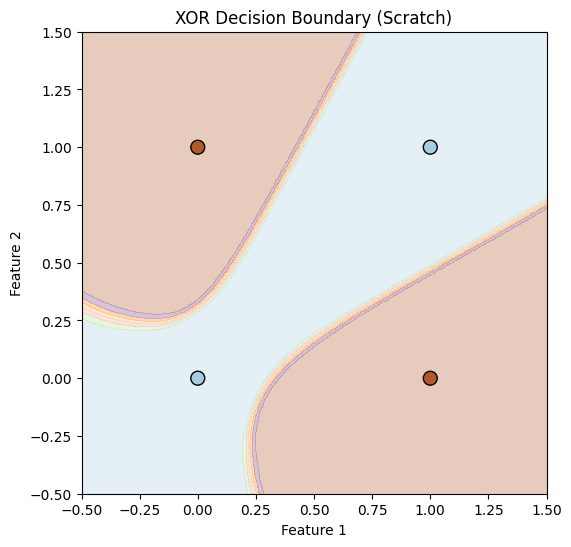

In [7]:
### random seeds for absolute reproducibility
np.random.seed(42)
random.seed(42)



### define activation functions and their derivatives
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

### initialize network parameters
input_size = 2
hidden_size = 8
output_size = 1

### Xavier initialization for weight scaling
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, hidden_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, hidden_size))
W3 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b3 = np.zeros((1, output_size))

### Adam optimizer parameters
alpha = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

### Adam momentum terms
m_W1, v_W1 = np.zeros_like(W1), np.zeros_like(W1)
m_b1, v_b1 = np.zeros_like(b1), np.zeros_like(b1)
m_W2, v_W2 = np.zeros_like(W2), np.zeros_like(W2)
m_b2, v_b2 = np.zeros_like(b2), np.zeros_like(b2)
m_W3, v_W3 = np.zeros_like(W3), np.zeros_like(W3)
m_b3, v_b3 = np.zeros_like(b3), np.zeros_like(b3)

### training loop
epochs = 10000
for epoch in range(1, epochs + 1):
    ### Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = tanh(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = tanh(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)  ### final output

    ### Compute loss (binary cross-entropy)
    loss = -np.mean(y * np.log(A3 + 1e-8) + (1 - y) * np.log(1 - A3 + 1e-8))

    ### Backpropagation
    dZ3 = A3 - y
    dW3 = np.dot(A2.T, dZ3) / X.shape[0]
    db3 = np.sum(dZ3, axis=0, keepdims=True) / X.shape[0]

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * tanh_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    ### Adam optimizer updates
    for param, dparam, m, v in zip(
        [W1, b1, W2, b2, W3, b3],
        [dW1, db1, dW2, db2, dW3, db3],
        [m_W1, m_b1, m_W2, m_b2, m_W3, m_b3],
        [v_W1, v_b1, v_W2, v_b2, v_W3, v_b3]
    ):
        m[:] = beta1 * m + (1 - beta1) * dparam
        v[:] = beta2 * v + (1 - beta2) * (dparam ** 2)
        m_hat = m / (1 - beta1 ** epoch)
        v_hat = v / (1 - beta2 ** epoch)
        param -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)

    ### Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

### final predictions after training
y_pred = (A3 > 0.5).astype(int)

### calculate accuracy
accuracy = np.mean(y_pred == y)
print("Training Accuracy:", accuracy)

### print model predictions
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {y_pred[i][0]}, Actual: {y[i][0]}")




### visualize decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                     np.linspace(-0.5, 1.5, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap=plt.cm.Paired)
plt.title("XOR Decision Boundary (Procedural)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# **5. Hybrid Approach: Object-Oriented Neural Network with NumPy and Adam Optimizer**  

This implementation is a **hybrid approach** that combines the **Object-Oriented Programming (OOP) paradigm** with a **fully manual backpropagation and Adam optimizer** using **NumPy**. The model follows the **Multi-Layer Perceptron (MLP) architecture** and is designed to solve the **XOR problem**, a classic problem that requires a **non-linear decision boundary**.

---

## **What is This Approach?**  
This approach is a **manual implementation** of a **feedforward neural network** (MLP) using NumPy, where:  
1. The neural network is implemented as a **Python class (`NeuralNetwork`)**.  
The model has **two hidden layers**, both using **tanh activation**.  
2. The output layer uses **sigmoid activation**, making it suitable for **binary classification**.  
3. **Backpropagation** is implemented **from scratch**, computing gradients manually.  
4. **The Adam Optimizer** is used for **efficient and stable weight updates**.  
5. The model is trained on the **XOR dataset**, which is a **non-linearly separable problem** requiring at least **one hidden layer** to solve.  

---

## **When to Use This Approach?**  

This approach is best used when:  
✅ You **want to build a neural network from scratch** without using external libraries.  
✅ You need to **understand the inner workings of forward and backward propagation**.  
✅ You are working on **simple binary classification tasks** like XOR.  
✅ You want **full control over weight updates** and **optimization methods**.  
✅ You need a **custom neural network implementation** for research or educational purposes.  

---


In [11]:
### ensure absolute reproducibility
np.random.seed(42)
random.seed(42)

class NeuralNetwork:
    """A Multi-Layer Perceptron (MLP) for solving the XOR problem using NumPy and the Adam optimizer."""

    def __init__(self, input_size=2, hidden_size=8, output_size=1):
        """Initialize weights and biases using Xavier initialization."""
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, hidden_size) * np.sqrt(2 / hidden_size)
        self.b2 = np.zeros((1, hidden_size))
        self.W3 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
        self.b3 = np.zeros((1, output_size))

        ### Adam optimizer parameters
        self.alpha = 0.01  ### Learning rate
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.m_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.m_b1, self.v_b1 = np.zeros_like(self.b1), np.zeros_like(self.b1)
        self.m_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.m_b2, self.v_b2 = np.zeros_like(self.b2), np.zeros_like(self.b2)
        self.m_W3, self.v_W3 = np.zeros_like(self.W3), np.zeros_like(self.W3)
        self.m_b3, self.v_b3 = np.zeros_like(self.b3), np.zeros_like(self.b3)
        self.t = 0  ### time step for Adam optimizer

    def tanh(self, x):
        """Tanh activation function."""
        return np.tanh(x)

    def tanh_derivative(self, x):
        """Derivative of tanh activation function."""
        return 1 - np.tanh(x) ** 2

    def sigmoid(self, x):
        """Sigmoid activation function for the output layer."""
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """Derivative of the sigmoid activation function."""
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def forward(self, X):
        """Perform a forward pass through the network."""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.tanh(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.tanh(self.Z2)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.sigmoid(self.Z3)  # Final output
        return self.A3

    def backward(self, X, y):
        """Compute gradients using backpropagation."""
        dZ3 = self.A3 - y
        dW3 = np.dot(self.A2.T, dZ3) / X.shape[0]
        db3 = np.sum(dZ3, axis=0, keepdims=True) / X.shape[0]
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.tanh_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / X.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.tanh_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / X.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]
        return dW1, db1, dW2, db2, dW3, db3

    def update_weights(self, dW1, db1, dW2, db2, dW3, db3):
        """Update weights using Adam optimizer."""
        self.t += 1
        for param, dparam, m, v in zip(
            [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3],
            [dW1, db1, dW2, db2, dW3, db3],
            [self.m_W1, self.m_b1, self.m_W2, self.m_b2, self.m_W3, self.m_b3],
            [self.v_W1, self.v_b1, self.v_W2, self.v_b2, self.v_W3, self.v_b3]
        ):
            m[:] = self.beta1 * m + (1 - self.beta1) * dparam
            v[:] = self.beta2 * v + (1 - self.beta2) * (dparam ** 2)
            m_hat = m / (1 - self.beta1 ** self.t)
            v_hat = v / (1 - self.beta2 ** self.t)
            param -= self.alpha * m_hat / (np.sqrt(v_hat) + self.epsilon)

    def train(self, X, y, epochs=10000):
        """Train the network using Adam optimization."""
        for epoch in range(1, epochs + 1):
            self.forward(X)
            dW1, db1, dW2, db2, dW3, db3 = self.backward(X, y)
            self.update_weights(dW1, db1, dW2, db2, dW3, db3)
            if epoch % 1000 == 0:
                loss = -np.mean(y * np.log(self.A3 + 1e-8) + (1 - y) * np.log(1 - self.A3 + 1e-8))
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

    def predict(self, X):
        """Make predictions using the trained network."""
        return (self.forward(X) >= 0.5).astype(int)



### initialize and train network
nn = NeuralNetwork()
nn.train(X, y, epochs=10000)

### make predictions
predictions = nn.predict(X)
print("Training Accuracy:", np.mean(predictions == y))


Epoch 1000, Loss: 0.000254
Epoch 2000, Loss: 0.000067
Epoch 3000, Loss: 0.000030
Epoch 4000, Loss: 0.000016
Epoch 5000, Loss: 0.000009
Epoch 6000, Loss: 0.000005
Epoch 7000, Loss: 0.000003
Epoch 8000, Loss: 0.000002
Epoch 9000, Loss: 0.000001
Epoch 10000, Loss: 0.000000
Training Accuracy: 1.0


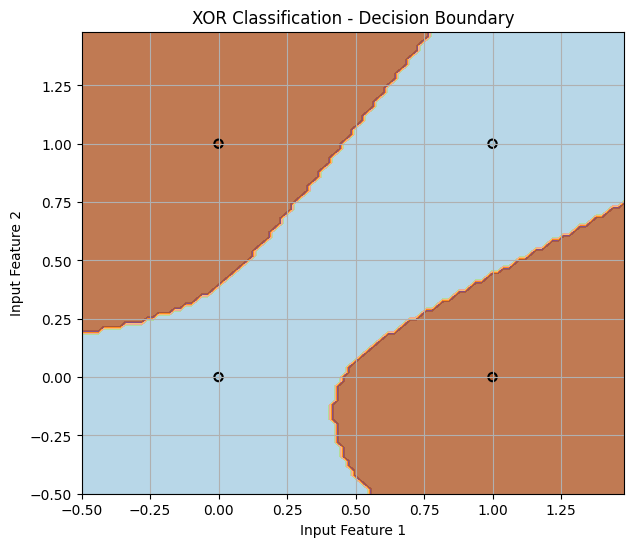

In [16]:
def plot_decision_boundary(nn, X, y):
    """Visualizes the decision boundary learned by the neural network."""

    ### make mesh grid of points in input space
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.02  ### step size for mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    ### predict class labels for each point in mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = nn.predict(grid_points)  ### get predictions
    Z = Z.reshape(xx.shape)  ### reshape for plotting

    ### create figure
    plt.figure(figsize=(7, 6))

    ### Ppot decision boundary using contour plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    ### Scatter plot actual XOR data points
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors="k", linewidth=1.5, cmap=plt.cm.Paired)

    ### labels and title
    plt.xlabel("Input Feature 1")
    plt.ylabel("Input Feature 2")
    plt.title("XOR Classification - Decision Boundary")

    plt.grid(True)
    plt.show()

### plot decision boundary
plot_decision_boundary(nn, X, y)

# **6. Class structure with TensorFlow framework**

Accuracy: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predictions:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


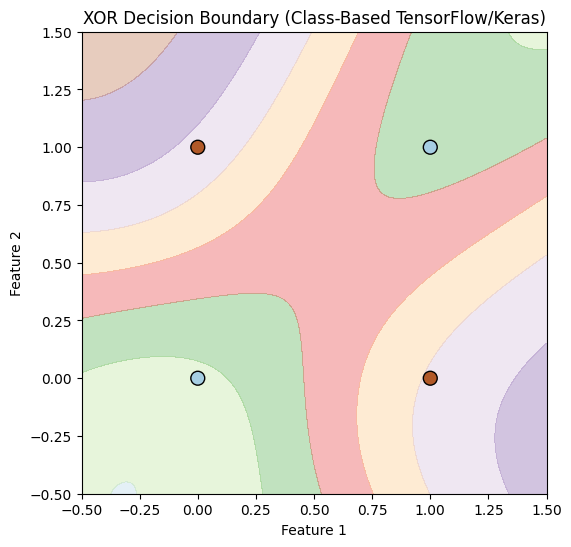

In [17]:
class XORNeuralNetwork:
    """Class-based implementation of XOR problem using TensorFlow/Keras."""

    def __init__(self):
        """Initialize the neural network architecture."""
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(8, activation='tanh', input_dim=2),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])


        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def train(self, X, y, epochs=500, verbose=0):
        """Train the neural network on the given dataset."""
        history = self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return history

    def evaluate(self, X, y):
        """Evaluate the neural network on the given dataset."""
        loss, accuracy = self.model.evaluate(X, y, verbose=0)
        print(f"Accuracy: {accuracy:.2f}")
        return accuracy

    def predict(self, X):
        """Make predictions using the trained model."""
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int)

    def visualize_decision_boundary(self, X, y):
        """Visualize the decision boundary of the neural network."""
        xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300), np.linspace(-0.5, 1.5, 300))
        Z = self.model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)


        plt.figure(figsize=(6, 6))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
        plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor='k', s=100, cmap=plt.cm.Paired)
        plt.title("XOR Decision Boundary (Class-Based TensorFlow/Keras)")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.5, 1.5)
        plt.grid(False)
        plt.show()


### initialize XOR Neural Network
xor_nn = XORNeuralNetwork()

### train Neural Network
xor_nn.train(X, y, epochs=500)

### evaluate Neural Network
xor_nn.evaluate(X, y)

### predict XOR Outputs
predictions = xor_nn.predict(X)
print("Predictions:")
for i, x in enumerate(X):
    print(f"Input: {x}, Predicted: {predictions[i][0]}, Actual: {y[i][0]}")

### visualize Decision Boundary
xor_nn.visualize_decision_boundary(X, y)

## **7. Completely from Scratch with Class Structure**

Epoch 0, Loss: 0.723254
Epoch 1000, Loss: 0.036402
Epoch 2000, Loss: 0.011326
Epoch 3000, Loss: 0.006253
Epoch 4000, Loss: 0.004203
Epoch 5000, Loss: 0.003120
Epoch 6000, Loss: 0.002460
Epoch 7000, Loss: 0.002019
Epoch 8000, Loss: 0.001706
Epoch 9000, Loss: 0.001472
Predictions:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0


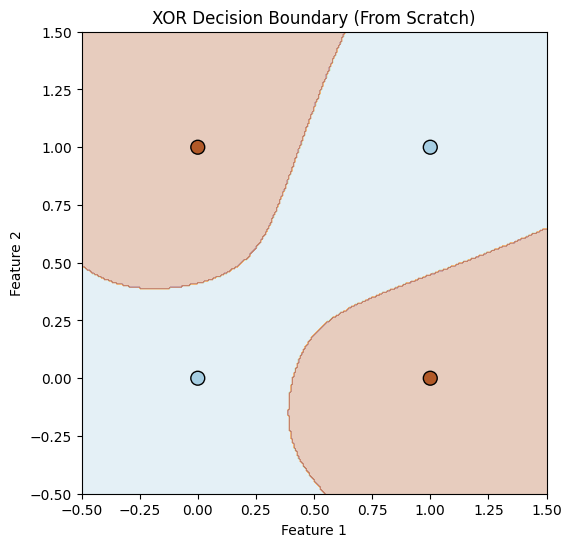

In [14]:
class XORNeuralNetworkFromScratch:
    """Class-based implementation of a neural network to solve XOR, built from scratch using NumPy."""

    def __init__(self, input_size=2, hidden_size=8, output_size=1, learning_rate=0.1):
        """Initialize the network with random weights and biases."""
        self.learning_rate = learning_rate

        # Xavier initialization for weights
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """Derivative of the sigmoid function."""
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def tanh(self, x):
        """Tanh activation function."""
        return np.tanh(x)

    def tanh_derivative(self, x):
        """Derivative of the tanh function."""
        return 1 - np.tanh(x) ** 2

    def forward(self, X):
        """Forward propagation."""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.tanh(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)  ### final output
        return self.A2

    def backward(self, X, y):
        """Backward propagation."""
        ### output layer error
        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / X.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

        ### hidden layer error
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.tanh_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / X.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

        ### update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs=10000):
        """Train the neural network."""
        for epoch in range(epochs):
            ### Forward pass
            self.forward(X)
            ### Backward pass
            self.backward(X, y)
            ### Print loss every 1000 epochs
            if epoch % 1000 == 0:
                loss = -np.mean(y * np.log(self.A2 + 1e-8) + (1 - y) * np.log(1 - self.A2 + 1e-8))
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

    def predict(self, X):
        """Predict using the trained network."""
        predictions = self.forward(X)
        return (predictions > 0.5).astype(int)

    def visualize_decision_boundary(self, X, y):
        """Visualize the decision boundary."""
        ### create mesh grid
        xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300), np.linspace(-0.5, 1.5, 300))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ### plot decision boundary
        plt.figure(figsize=(6, 6))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
        plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor='k', s=100, cmap=plt.cm.Paired)
        plt.title("XOR Decision Boundary (From Scratch)")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.5, 1.5)
        plt.grid(False)
        plt.show()


### initialize XOR Neural Network
xor_nn = XORNeuralNetworkFromScratch()

### train Neural Network
xor_nn.train(X, y, epochs=10000)

### evaluate Neural Network
predictions = xor_nn.predict(X)
print("Predictions:")
for i, x in enumerate(X):
    print(f"Input: {x}, Predicted: {predictions[i][0]}, Actual: {y[i][0]}")

### visualize Decision Boundary
xor_nn.visualize_decision_boundary(X, y)